In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import data

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, mean_absolute_error)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/CZ4042/project/train.txt', sep=';', engine='python', names=['col', 'senti'])
test = pd.read_csv('/content/drive/MyDrive/CZ4042/project/test.txt', sep=';', engine='python', names=['col', 'senti'])
valid = pd.read_csv('/content/drive/MyDrive/CZ4042/project/val.txt', sep=';', engine='python', names=['col', 'senti'])

In [ ]:
data = pd.concat([train, test, valid])
data.head()

,col,senti
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
infile = open('/content/drive/MyDrive/CZ4042/project/data1_4999.pkl','rb')
embed_matrix1 = pickle.load(infile)
infile.close()

In [ ]:
infile = open('/content/drive/MyDrive/CZ4042/project/data5000_9999.pkl','rb')
embed_matrix2 = pickle.load(infile)
infile.close()

In [ ]:
infile = open('/content/drive/MyDrive/CZ4042/project/data10000_14999.pkl','rb')
embed_matrix3 = pickle.load(infile)
infile.close()

In [ ]:
infile = open('/content/drive/MyDrive/CZ4042/project/data15000_20000.pkl','rb')
embed_matrix4 = pickle.load(infile)
infile.close()

In [ ]:
embed_matrix = np.concatenate((embed_matrix1, embed_matrix2, embed_matrix3, embed_matrix4), axis = 0)
len(embed_matrix)

20000

In [ ]:
embed_matrix

array([[[-5.92755318e-01,  1.08719699e-01,  1.52256405e+00, ...,
         -2.44393110e-01, -9.89357591e-01,  1.01306245e-01],
        [-1.07708406e+00,  9.84628737e-01,  2.86861092e-01, ...,
         -4.65327978e-01, -1.27242124e+00, -2.04063267e-01],
        [-1.60050976e+00, -5.79966128e-01,  1.07468748e+00, ...,
          9.58029032e-01,  5.36716223e-01,  6.42740130e-01],
        ...,
        [-2.01874781e+00, -2.49357954e-01,  6.92668334e-02, ...,
         -1.12001610e+00, -5.77039838e-01,  7.58698046e-01],
        [-1.95776224e+00,  9.85130370e-02,  3.40646327e-01, ...,
         -4.31743205e-01, -5.17246842e-01,  4.29039538e-01],
        [-1.05263734e+00, -6.34035587e-01,  5.27486205e-01, ...,
         -3.35954845e-01,  6.74785495e-01,  8.21991980e-01]],

       [[-1.18984088e-01, -5.55672228e-01,  1.46390986e+00, ...,
         -5.10120392e-01, -9.54831123e-01, -8.72433558e-02],
        [-6.58070922e-01,  8.29526007e-01,  2.28678167e-01, ...,
         -4.99930650e-01, -9.95835245e

In [ ]:
embed_matrix.shape

(20000, 128, 256)

In [ ]:
## encode sentiment column to onehot
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['senti'].to_numpy().reshape(-1, 1))
onehot_sentiment = enc.transform(data['senti'].to_numpy().reshape(-1, 1)).toarray()
# onehot_sentiment = onehot_sentiment.reshape((40000, 1, 13))
data.insert(1, "onehot_sentiment", list(onehot_sentiment))
data

,col,onehot_sentiment,senti
0,i didnt feel humiliated,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",sadness
1,i can go from feeling so hopeless to so damned...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",sadness
2,im grabbing a minute to post i feel greedy wrong,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",anger
3,i am ever feeling nostalgic about the fireplac...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",love
4,i am feeling grouchy,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",anger
...,...,...,...
1995,im having ssa examination tomorrow in the morn...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",sadness
1996,i constantly worry about their fight against n...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",joy
1997,i feel its important to share this info for th...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",joy
1998,i truly feel that if you are passionate enough...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",joy


In [ ]:
y = data['onehot_sentiment'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embed_matrix, y, test_size = 0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14000, 128, 256) (14000,)
(6000, 128, 256) (6000,)


In [ ]:
y_train = np.array([np.array(x) for x in y_train])
y_test = np.array([np.array(x) for x in y_test])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14000, 128, 256) (14000, 6)
(6000, 128, 256) (6000, 6)


In [ ]:
X_train

array([[[-0.22728157,  0.09205835,  0.63750106, ..., -1.3906277 ,
         -0.66023636, -0.31949037],
        [-0.5720513 ,  1.0147568 ,  0.0112118 , ..., -0.70768535,
         -0.70586157, -0.18882908],
        [ 0.07662952,  2.018813  ,  0.4930962 , ..., -0.27185324,
         -0.11939301, -0.16322595],
        ...,
        [-1.3689477 , -0.23964041, -0.6235913 , ..., -1.700817  ,
         -0.8347093 ,  0.12975663],
        [-1.0614823 , -0.18855473, -0.29290593, ..., -0.95839673,
         -0.6853627 , -0.02011925],
        [-0.76136494,  0.46353614, -0.5242774 , ..., -1.0797144 ,
         -0.07527901, -0.46032554]],

       [[-0.88547707, -0.51195264,  0.98020077, ...,  0.13506764,
         -0.9420756 ,  0.13437483],
        [-1.2315931 ,  0.95971096,  0.9092891 , ..., -0.39427853,
          0.10338588,  0.492668  ],
        [-0.56337804,  0.68106353,  1.2103716 , ...,  0.74608845,
          0.38111064,  0.11032807],
        ...,
        [-1.9673021 , -0.3837776 , -0.29782936, ..., -

## BLSTM Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
# from keras_self_attention import SeqSelfAttention, SeqWeightedAttention


class ZhouBLSTMCNNModel:

    def __init__(self,
        # embedding,
        # em_drop_rate = 0.5,
        lstm_units   = 300,
        lstm_drop_rate = 0.5,
        conv_size    = (3, 3),
        conv_filters = 100,
        pool_size    = (2, 2),
        pool_drop_rate = 0.5):
        '''Constructor.
        # Parameters:
        embedding: Numpy array representing the embedding.
        em_drop_rate: Drop rate after the embedding layer.
        lstm_units: Size of the internal states of the LSTM cells.
        lstm_drop_rate: Drop rate after the lstm layer.
        conv_size: Size of the convolutions.
        conv_filters: Number of convolutions filters.
        pool_size: Size for the max pooling layer.
        pool_drop_rate: Drop rate of the max pooling layer.
        '''
        # self._embedding      = embedding
        # self._em_drop_rate   = em_drop_rate
        self._lstm_units     = lstm_units
        self._lstm_drop_rate = lstm_drop_rate
        self._conv_size      = conv_size
        self._conv_filters   = conv_filters
        self._pool_size      = pool_size
        self._pool_drop_rate = pool_drop_rate

    def __call__(self, input):
        # self._embedding_tf = self._create_embedding_layer(
        #     self._em_drop_rate, self._embedding, input)

        self._sequences_tf = self._create_blstm_layer(
            self._lstm_units,
            self._lstm_drop_rate,
            input)

        self._convolution_tf = self._create_convolutional_layer(
            self._conv_size,
            self._conv_filters,
            self._sequences_tf)
        
        self._pooling_tf = self._create_maxpooling_layer(
            self._pool_size,
            self._pool_drop_rate,
            self._convolution_tf)

        self._flatten_tf = self._create_flatten_layer(self._pooling_tf)

        return self._flatten_tf

    def summary(self):
        # print("embedding: " + str(self._embedding_tf.shape))
        print("lstm: " + str(self._sequences_tf.shape))
        print("conv: " + str(self._convolution_tf.shape))
        print("pooling: " + str(self._pooling_tf.shape))
        print("flatten: " + str(self._flatten_tf.shape))

    # this function converts each word from input_x into dense vector of dimension 300 (dimension depending on word2vec)
    # embedding  = word_vector
    # def _create_embedding_layer(self, em_drop_rate, embedding, input_x):
    #     embedding = tf.Variable(initial_value=embedding)

    #     embedded_chars = tf.nn.embedding_lookup(  # lookup word_vector(embedding) by index (input_x)
    #         embedding, tf.cast(input_x, 'int32'))

    #     return tf.nn.dropout(embedded_chars, rate=em_drop_rate)

    # bidirectional lstm layer
    # 
    def _create_blstm_layer(self, lstm_units, lstm_drop_rate, input):
        lstm_cell = tf.compat.v1.nn.rnn_cell.LSTMCell(lstm_units)
        sequence = tf.unstack(input, axis=1) #embedded input words
        
        # hs, _, _ are outputs, output_state_fw, output_state_bw respectively
        hs, _, _ = tf.compat.v1.nn.static_bidirectional_rnn(lstm_cell, lstm_cell, #forward and backward direction
            sequence, #input
            dtype=tf.float32)
        
        hs = tf.stack(
            values=hs,
            axis=1)
        ss = tf.math.reduce_sum(
            tf.reshape(hs, shape=[-1, hs.shape[1], 2, lstm_units]),
            axis=2
        )
        
        # attn = SeqSelfAttention(attention_activation='sigmoid')(ss)

        return tf.nn.dropout(ss, rate=lstm_drop_rate)

    def _create_convolutional_layer(self,
        conv_size, num_filters, tensor):
        
        print(str(tensor.shape))

        filter_heigth = conv_size[0]
        filter_width  = conv_size[1]

        filter_shape = [filter_heigth, filter_width,
            1, num_filters]

        W = tf.Variable(
            initial_value=tf.random.truncated_normal(
                shape=filter_shape,
                stddev=0.1))
        b = tf.Variable(
            initial_value=tf.random.truncated_normal(
                shape=[num_filters]))

        tensor_expanded = tf.expand_dims(tensor, -1)
        conv = tf.nn.conv2d(
            input=tensor_expanded,
            filters=W, #####filter to filters, idk if it changed stuff
            strides=[1,1,1,1],
            padding='VALID')

        bias = tf.nn.bias_add(conv, b)
        c = tf.nn.relu(bias)

        return c

    def _create_maxpooling_layer(self, size, pool_drop_rate, conv):
        pooled = tf.nn.max_pool3d(
            input=tf.expand_dims(conv, -1),
            ksize=[1, size[0], size[1], conv.shape[3], 1],
            strides=[1, size[0], size[1], conv.shape[3], 1],
            padding='VALID')
        
        return tf.nn.dropout(pooled, rate=pool_drop_rate)

    def _create_flatten_layer(self, tensor):
        return tf.reshape(tensor, [-1, tensor.shape[1] * tensor.shape[2]])


if __name__ == '__main__':
    embedding_size  = 256
    num_words       = 1000
    sentence_length = 128

    embedding = [
        [float(i) for i in range(embedding_size)] for _ in range(num_words)
    ]
    data = [
        X_train[1],
        X_train[2]
    ]

    model = ZhouBLSTMCNNModel()
    model(data)
    model.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell, unroll=True))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API


/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:988: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  partitioner=maybe_partitioner)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:996: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=initializer)


(2, 128, 300)
lstm: (2, 128, 300)
conv: (2, 126, 298, 100)
pooling: (2, 63, 149, 1, 1)
flatten: (2, 9387)


In [ ]:
import tensorflow as tf
from numba import jit, cuda

class Classifier:

    def __init__(self, model, input_length, output_length):
        '''Constructor.
        # Parameters:
        input_length: sentence length (max number of words in sentence)
        output_length: number of classes of sentiment
        '''
        self.model = model
        self.input_length = input_length
        self.output_length = output_length

    def compile(self, batch_size=32):
        tf.compat.v1.disable_eager_execution()
        self._ds_x = tf.compat.v1.placeholder(tf.float32, [None, self.input_length, 256])
        self._ds_y = tf.compat.v1.placeholder(tf.float32, [None, self.output_length])

        ds = tf.compat.v1.data.Dataset.from_tensor_slices((self._ds_x, self._ds_y))
        ds = ds.batch(batch_size)

        self._ds_it = ds.make_initializable_iterator()
        self._input, self._labels = self._ds_it.get_next()

        self._features = self.model(self._input)
        self._output = _create_dense_layer(self._features, self.output_length)

        self._create_acc_computations()
        self._create_backpropagation()

        self._session = tf.compat.v1.Session()
        self._session.run(tf.compat.v1.global_variables_initializer())
        self._session.run(tf.compat.v1.local_variables_initializer())

    def _create_acc_computations(self):
        self._predictions = tf.argmax(self._output, 1)
        labels = tf.argmax(self._labels, 1)
        self._accuracy = tf.reduce_mean(
            tf.cast(tf.equal(self._predictions, labels), 'float32'))

    def _create_backpropagation(self):
        losses = tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(
            logits=self._output,
            labels=self._labels)
        self._loss = tf.reduce_mean(losses)

        optimizer = tf.compat.v1.train.AdamOptimizer(0.001)
        global_step = tf.Variable(0, name="global_step", trainable=False)
        grads_and_vars = optimizer.compute_gradients(self._loss)

        self._train_op = optimizer.apply_gradients(
            grads_and_vars, global_step=global_step)

    def summary(self):
        print('input:', self._input.shape)
        self.model.summary()
        print('output:', self._output.shape)

#     @jit(target ="cuda")  
    def train(self, X_train, y_train, X_eval, y_eval, epochs=10):
        import time
        losslist, acclist, val_losslist, val_acclist = [], [], [],[]
        for e in range(epochs):
            start_time = time.time()
            loss, acc = self._train(X_train, y_train)
            duration = time.time() - start_time

            val_loss, val_acc = self._eval(X_eval, y_eval)

            losslist.append(loss)
            acclist.append(acc)
            val_losslist.append(val_loss)
            val_acclist.append(val_acc)
            
            output = 'Epoch: {}, loss = {:.4f}, acc = {:.4f}, val_loss = {:.4f}, val_acc = {:.4f}, Time = {:.2f}s'
            print(output.format(e + 1, loss, acc, val_loss, val_acc, duration))
        # endfor
        return losslist, acclist, val_losslist, val_acclist

#     @jit(target ="cuda")  
    def _train(self, X_train, y_train):
        import numpy as np

        self._session.run(
            fetches=self._ds_it.initializer,
            feed_dict={
                self._ds_x: X_train,
                self._ds_y: y_train
            })
        loss, acc, = [], []
        while True:
            try:
                _, vloss, vacc = self._session.run(
                    fetches=[self._train_op, self._loss, self._accuracy])

                loss.append(vloss)
                acc.append(vacc)
            except tf.errors.OutOfRangeError:
                break
        # endwhile

        loss, acc = np.mean(loss), np.mean(acc)
        return loss, acc

    def _eval(self, X_val, y_val):
        self._session.run(
            fetches=self._ds_it.initializer,
            feed_dict={
                self._ds_x: X_val,
                self._ds_y: y_val
            })

        loss, acc, = 0, 0
        while True:
            try:
                l, vloss, vacc = self._session.run(
                    fetches=[self._labels, self._loss, self._accuracy])

                loss += vloss * len(l)
                acc += vacc * len(l)
            except tf.errors.OutOfRangeError:
                break

        return loss / len(X_val), acc / len(X_val)

    def predict(self, X):
        import numpy as np

        self._session.run(self._ds_it.initializer,
                         feed_dict={
                             self._ds_x: X,
                             self._ds_y: np.empty((len(X), self.output_length))
                         }
                         )

        pred = list()
        while True:
            try:
                ppred = self._session.run(tf.nn.softmax(self._output))

                pred.extend(map(lambda l: l.tolist(), ppred))
            except tf.errors.OutOfRangeError:
                break

        return pred

def _create_dense_layer(x, output_length):
    '''Creates a dense layer
    '''
    input_size = x.shape[1] #.value
    W = tf.Variable(
        initial_value=tf.random.truncated_normal(
            shape=[input_size, output_length],
            stddev=0.1))
    b = tf.Variable(
        initial_value=tf.random.truncated_normal(
            shape=[output_length]))

    dense = tf.compat.v1.nn.xw_plus_b(x, W, b)

    return dense


if __name__ == '__main__':
    pass

In [ ]:
import pickle
import numpy as np
import sys
# from fen.classifier import Classifier
# from fen.pzhou_tf import ZhouBLSTMCNNModel

if __name__ == '__main__':

#     (X_train, y_train), (X_eval, y_eval) = (X_train, y_train), (X_test, y_test)

    # word_vector = word_embeds
    # word_vector = word_vector.astype('float32')
    
    sentence_length = 128 # sentence length = 37 -- if less than 37, remaining is 0
    num_classes = y_train[0].shape[0] # 6 sentiment classes

#     with tf.compat.v1.variable_scope(tf.compat.v1.get_variable_scope(), reuse=True):
    model = ZhouBLSTMCNNModel() #pass in word_vector as lookup table

    classifier = Classifier(
        model=model,
        input_length=sentence_length,
        output_length=num_classes)

    classifier.compile(batch_size=10)
    classifier.summary()
    loss, acc, val_loss, vaL_acc = classifier.train(
        X_train=X_train,
        y_train=y_train,
        X_eval=X_test,
        y_eval=y_test,
        epochs=50
    )

    print("Predictions:", classifier.predict(X_train[0:2]))
    print("Real:", y_train[0:2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:988: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  partitioner=maybe_partitioner)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:996: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=initializer)


(None, 128, 300)
input: (None, 128, 256)
lstm: (None, 128, 300)
conv: (None, 126, 298, 100)
pooling: (None, 63, 149, 1, 1)
flatten: (None, 9387)
output: (None, 6)
Epoch: 1, loss = 12.3015, acc = 0.2977, val_loss = 3.5060, val_acc = 0.2583, Time = 119.18s
Epoch: 2, loss = 2.2319, acc = 0.3488, val_loss = 1.8666, val_acc = 0.3433, Time = 108.71s
Epoch: 3, loss = 1.7295, acc = 0.3959, val_loss = 1.6280, val_acc = 0.3868, Time = 109.52s
Epoch: 4, loss = 1.5132, acc = 0.4412, val_loss = 1.4734, val_acc = 0.4290, Time = 111.82s
Epoch: 5, loss = 1.4024, acc = 0.4794, val_loss = 1.3803, val_acc = 0.4652, Time = 108.19s
Epoch: 6, loss = 1.3187, acc = 0.5111, val_loss = 1.3137, val_acc = 0.4973, Time = 108.29s
Epoch: 7, loss = 1.2871, acc = 0.5222, val_loss = 1.2719, val_acc = 0.5100, Time = 108.15s
Epoch: 8, loss = 1.2516, acc = 0.5404, val_loss = 1.2569, val_acc = 0.5198, Time = 108.11s
Epoch: 9, loss = 1.2050, acc = 0.5546, val_loss = 1.2138, val_acc = 0.5400, Time = 108.29s
Epoch: 10, loss =

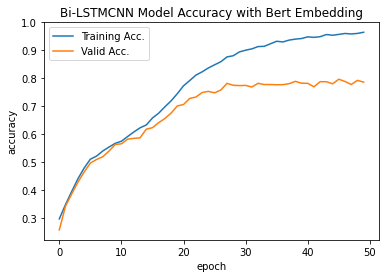

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(acc, label='Training Acc.')
plt.plot(vaL_acc, label='Valid Acc.')
plt.title('Bi-LSTMCNN Model Accuracy with Bert Embedding')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.savefig('BLSTMCNN(bert)_acc.png')

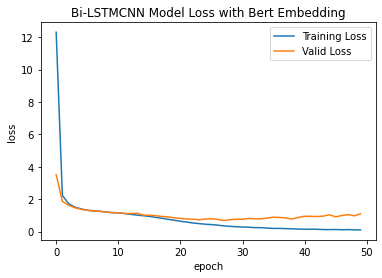

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Valid Loss')
plt.title('Bi-LSTMCNN Model Loss with Bert Embedding')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.savefig('BLSTMCNN(bert)_loss.png')

In [ ]:
result_table = pd.DataFrame(
    {'loss': loss,
     'acc': acc,
     'val_loss': val_loss,
     'val_acc': vaL_acc
    })

In [ ]:
result_table['epoch'] = range(1,51)

In [ ]:
result_table.to_csv('Bi_LSTMCNN(bert)result_table.csv')

## BLSTM with attention


In [ ]:
pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.50.0-py3-none-any.whl size=19414 sha256=f6dfddf863182a50ed003de9b40861612a6ad29898da300b9260fddd056ed6dc
  Stored in directory: /root/.cache/pip/wheels/92/7a/a3/231bef5803298e7ec1815215bc0613239cb1e9c03c57b13c14
Successfully built keras-self-attention


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention


class ZhouBLSTMCNNModel:

    def __init__(self,
        # embedding,
        # em_drop_rate = 0.5,
        lstm_units   = 300,
        lstm_drop_rate = 0.5,
        conv_size    = (3, 3),
        conv_filters = 100,
        pool_size    = (2, 2),
        pool_drop_rate = 0.5):
        '''Constructor.
        # Parameters:
        embedding: Numpy array representing the embedding.
        em_drop_rate: Drop rate after the embedding layer.
        lstm_units: Size of the internal states of the LSTM cells.
        lstm_drop_rate: Drop rate after the lstm layer.
        conv_size: Size of the convolutions.
        conv_filters: Number of convolutions filters.
        pool_size: Size for the max pooling layer.
        pool_drop_rate: Drop rate of the max pooling layer.
        '''
        # self._embedding      = embedding
        # self._em_drop_rate   = em_drop_rate
        self._lstm_units     = lstm_units
        self._lstm_drop_rate = lstm_drop_rate
        self._conv_size      = conv_size
        self._conv_filters   = conv_filters
        self._pool_size      = pool_size
        self._pool_drop_rate = pool_drop_rate

    def __call__(self, input):
        # self._embedding_tf = self._create_embedding_layer(
        #     self._em_drop_rate, self._embedding, input)

        self._sequences_tf = self._create_blstm_layer(
            self._lstm_units,
            self._lstm_drop_rate,
            input)

        self._convolution_tf = self._create_convolutional_layer(
            self._conv_size,
            self._conv_filters,
            self._sequences_tf)
        
        self._pooling_tf = self._create_maxpooling_layer(
            self._pool_size,
            self._pool_drop_rate,
            self._convolution_tf)

        self._flatten_tf = self._create_flatten_layer(self._pooling_tf)

        return self._flatten_tf

    def summary(self):
        # print("embedding: " + str(self._embedding_tf.shape))
        print("lstm: " + str(self._sequences_tf.shape))
        print("conv: " + str(self._convolution_tf.shape))
        print("pooling: " + str(self._pooling_tf.shape))
        print("flatten: " + str(self._flatten_tf.shape))

    # this function converts each word from input_x into dense vector of dimension 300 (dimension depending on word2vec)
    # embedding  = word_vector
    # def _create_embedding_layer(self, em_drop_rate, embedding, input_x):
    #     embedding = tf.Variable(initial_value=embedding)

    #     embedded_chars = tf.nn.embedding_lookup(  # lookup word_vector(embedding) by index (input_x)
    #         embedding, tf.cast(input_x, 'int32'))

    #     return tf.nn.dropout(embedded_chars, rate=em_drop_rate)

    # bidirectional lstm layer
    # 
    def _create_blstm_layer(self, lstm_units, lstm_drop_rate, input):
        lstm_cell = tf.compat.v1.nn.rnn_cell.LSTMCell(lstm_units)
        sequence = tf.unstack(input, axis=1) #embedded input words
        
        # hs, _, _ are outputs, output_state_fw, output_state_bw respectively
        hs, _, _ = tf.compat.v1.nn.static_bidirectional_rnn(lstm_cell, lstm_cell, #forward and backward direction
            sequence, #input
            dtype=tf.float32)
        
        hs = tf.stack(
            values=hs,
            axis=1)
        ss = tf.math.reduce_sum(
            tf.reshape(hs, shape=[-1, hs.shape[1], 2, lstm_units]),
            axis=2
        )
        
        attn = SeqSelfAttention(attention_activation='sigmoid')(ss)

        return tf.nn.dropout(ss, rate=lstm_drop_rate)

    def _create_convolutional_layer(self,
        conv_size, num_filters, tensor):
        
        print(str(tensor.shape))

        filter_heigth = conv_size[0]
        filter_width  = conv_size[1]

        filter_shape = [filter_heigth, filter_width,
            1, num_filters]

        W = tf.Variable(
            initial_value=tf.random.truncated_normal(
                shape=filter_shape,
                stddev=0.1))
        b = tf.Variable(
            initial_value=tf.random.truncated_normal(
                shape=[num_filters]))

        tensor_expanded = tf.expand_dims(tensor, -1)
        conv = tf.nn.conv2d(
            input=tensor_expanded,
            filters=W, #####filter to filters, idk if it changed stuff
            strides=[1,1,1,1],
            padding='VALID')

        bias = tf.nn.bias_add(conv, b)
        c = tf.nn.relu(bias)

        return c

    def _create_maxpooling_layer(self, size, pool_drop_rate, conv):
        pooled = tf.nn.max_pool3d(
            input=tf.expand_dims(conv, -1),
            ksize=[1, size[0], size[1], conv.shape[3], 1],
            strides=[1, size[0], size[1], conv.shape[3], 1],
            padding='VALID')
        
        return tf.nn.dropout(pooled, rate=pool_drop_rate)

    def _create_flatten_layer(self, tensor):
        return tf.reshape(tensor, [-1, tensor.shape[1] * tensor.shape[2]])


if __name__ == '__main__':
    embedding_size  = 256
    num_words       = 1000
    sentence_length = 128

    embedding = [
        [float(i) for i in range(embedding_size)] for _ in range(num_words)
    ]
    data = [
        X_train[1],
        X_train[2]
    ]

    model = ZhouBLSTMCNNModel()
    model(data)
    model.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:988: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  partitioner=maybe_partitioner)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:996: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=initializer)


(2, 128, 300)
lstm: (2, 128, 300)
conv: (2, 126, 298, 100)
pooling: (2, 63, 149, 1, 1)
flatten: (2, 9387)


In [ ]:
import tensorflow as tf
from numba import jit, cuda

class Classifier:

    def __init__(self, model, input_length, output_length):
        '''Constructor.
        # Parameters:
        input_length: sentence length (max number of words in sentence)
        output_length: number of classes of sentiment
        '''
        self.model = model
        self.input_length = input_length
        self.output_length = output_length

    def compile(self, batch_size=32):
        tf.compat.v1.disable_eager_execution()
        self._ds_x = tf.compat.v1.placeholder(tf.float32, [None, self.input_length, 256])
        self._ds_y = tf.compat.v1.placeholder(tf.float32, [None, self.output_length])

        ds = tf.compat.v1.data.Dataset.from_tensor_slices((self._ds_x, self._ds_y))
        ds = ds.batch(batch_size)

        self._ds_it = ds.make_initializable_iterator()
        self._input, self._labels = self._ds_it.get_next()

        self._features = self.model(self._input)
        self._output = _create_dense_layer(self._features, self.output_length)

        self._create_acc_computations()
        self._create_backpropagation()

        self._session = tf.compat.v1.Session()
        self._session.run(tf.compat.v1.global_variables_initializer())
        self._session.run(tf.compat.v1.local_variables_initializer())

    def _create_acc_computations(self):
        self._predictions = tf.argmax(self._output, 1)
        labels = tf.argmax(self._labels, 1)
        self._accuracy = tf.reduce_mean(
            tf.cast(tf.equal(self._predictions, labels), 'float32'))

    def _create_backpropagation(self):
        losses = tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(
            logits=self._output,
            labels=self._labels)
        self._loss = tf.reduce_mean(losses)

        optimizer = tf.compat.v1.train.AdamOptimizer(0.001)
        global_step = tf.Variable(0, name="global_step", trainable=False)
        grads_and_vars = optimizer.compute_gradients(self._loss)

        self._train_op = optimizer.apply_gradients(
            grads_and_vars, global_step=global_step)

    def summary(self):
        print('input:', self._input.shape)
        self.model.summary()
        print('output:', self._output.shape)

#     @jit(target ="cuda")  
    def train(self, X_train, y_train, X_eval, y_eval, epochs=10):
        import time
        losslist, acclist, val_losslist, val_acclist = [], [], [],[]
        for e in range(epochs):
            start_time = time.time()
            loss, acc = self._train(X_train, y_train)
            duration = time.time() - start_time

            val_loss, val_acc = self._eval(X_eval, y_eval)

            losslist.append(loss)
            acclist.append(acc)
            val_losslist.append(val_loss)
            val_acclist.append(val_acc)
            
            output = 'Epoch: {}, loss = {:.4f}, acc = {:.4f}, val_loss = {:.4f}, val_acc = {:.4f}, Time = {:.2f}s'
            print(output.format(e + 1, loss, acc, val_loss, val_acc, duration))
        # endfor
        return losslist, acclist, val_losslist, val_acclist

#     @jit(target ="cuda")  
    def _train(self, X_train, y_train):
        import numpy as np

        self._session.run(
            fetches=self._ds_it.initializer,
            feed_dict={
                self._ds_x: X_train,
                self._ds_y: y_train
            })
        loss, acc, = [], []
        while True:
            try:
                _, vloss, vacc = self._session.run(
                    fetches=[self._train_op, self._loss, self._accuracy])

                loss.append(vloss)
                acc.append(vacc)
            except tf.errors.OutOfRangeError:
                break
        # endwhile

        loss, acc = np.mean(loss), np.mean(acc)
        return loss, acc

    def _eval(self, X_val, y_val):
        self._session.run(
            fetches=self._ds_it.initializer,
            feed_dict={
                self._ds_x: X_val,
                self._ds_y: y_val
            })

        loss, acc, = 0, 0
        while True:
            try:
                l, vloss, vacc = self._session.run(
                    fetches=[self._labels, self._loss, self._accuracy])

                loss += vloss * len(l)
                acc += vacc * len(l)
            except tf.errors.OutOfRangeError:
                break

        return loss / len(X_val), acc / len(X_val)

    def predict(self, X):
        import numpy as np

        self._session.run(self._ds_it.initializer,
                         feed_dict={
                             self._ds_x: X,
                             self._ds_y: np.empty((len(X), self.output_length))
                         }
                         )

        pred = list()
        while True:
            try:
                ppred = self._session.run(tf.nn.softmax(self._output))

                pred.extend(map(lambda l: l.tolist(), ppred))
            except tf.errors.OutOfRangeError:
                break

        return pred

def _create_dense_layer(x, output_length):
    '''Creates a dense layer
    '''
    input_size = x.shape[1] #.value
    W = tf.Variable(
        initial_value=tf.random.truncated_normal(
            shape=[input_size, output_length],
            stddev=0.1))
    b = tf.Variable(
        initial_value=tf.random.truncated_normal(
            shape=[output_length]))

    dense = tf.compat.v1.nn.xw_plus_b(x, W, b)

    return dense


if __name__ == '__main__':
    pass

In [ ]:
import pickle
import numpy as np
import sys
# from fen.classifier import Classifier
# from fen.pzhou_tf import ZhouBLSTMCNNModel

if __name__ == '__main__':

#     (X_train, y_train), (X_eval, y_eval) = (X_train, y_train), (X_test, y_test)

    # word_vector = word_embeds
    # word_vector = word_vector.astype('float32')
    
    sentence_length = 128 # sentence length = 37 -- if less than 37, remaining is 0
    num_classes = y_train[0].shape[0] # 6 sentiment classes

#     with tf.compat.v1.variable_scope(tf.compat.v1.get_variable_scope(), reuse=True):
    model = ZhouBLSTMCNNModel() #pass in word_vector as lookup table

    classifier = Classifier(
        model=model,
        input_length=sentence_length,
        output_length=num_classes)

    classifier.compile(batch_size=10)
    classifier.summary()
    a_loss, a_acc, a_val_loss, a_vaL_acc = classifier.train(
        X_train=X_train,
        y_train=y_train,
        X_eval=X_test,
        y_eval=y_test,
        epochs=50
    )

    print("Predictions:", classifier.predict(X_train[0:2]))
    print("Real:", y_train[0:2])

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_initializable_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:988: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  partitioner=maybe_partitioner)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:996: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=initializer)


(None, 128, 300)
input: (None, 128, 256)
lstm: (None, 128, 300)
conv: (None, 126, 298, 100)
pooling: (None, 63, 149, 1, 1)
flatten: (None, 9387)
output: (None, 6)
Epoch: 1, loss = 14.9411, acc = 0.3089, val_loss = 9.2521, val_acc = 0.3880, Time = 129.37s
Epoch: 2, loss = 6.5388, acc = 0.3930, val_loss = 4.0844, val_acc = 0.4343, Time = 119.86s
Epoch: 3, loss = 2.8890, acc = 0.4757, val_loss = 1.9140, val_acc = 0.4733, Time = 117.08s
Epoch: 4, loss = 1.3300, acc = 0.5771, val_loss = 1.0709, val_acc = 0.6142, Time = 115.91s
Epoch: 5, loss = 0.9238, acc = 0.6701, val_loss = 0.9758, val_acc = 0.6573, Time = 117.07s
Epoch: 6, loss = 0.8139, acc = 0.7046, val_loss = 0.8663, val_acc = 0.6908, Time = 116.08s
Epoch: 7, loss = 0.7086, acc = 0.7437, val_loss = 0.8393, val_acc = 0.7015, Time = 116.63s
Epoch: 8, loss = 0.6067, acc = 0.7816, val_loss = 0.8212, val_acc = 0.7172, Time = 116.21s
Epoch: 9, loss = 0.5198, acc = 0.8131, val_loss = 0.8317, val_acc = 0.7290, Time = 115.34s
Epoch: 10, loss =

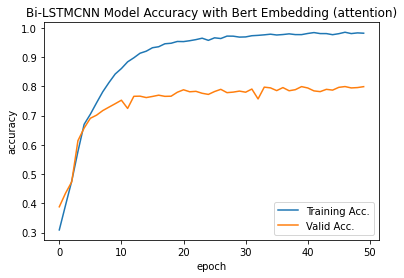

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(a_acc, label='Training Acc.')
plt.plot(a_vaL_acc, label='Valid Acc.')
plt.title('Bi-LSTMCNN Model Accuracy with Bert Embedding (attention)')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.savefig('BLSTMCNN(bert)_acc.png')

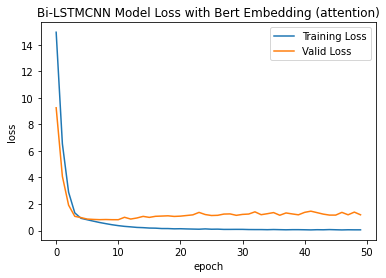

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(a_loss, label='Training Loss')
plt.plot(a_val_loss, label='Valid Loss')
plt.title('Bi-LSTMCNN Model Loss with Bert Embedding (attention)')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.savefig('BLSTMCNN(bert)_loss.png')

In [ ]:
result_table = pd.DataFrame(
    {'loss': a_loss,
     'acc': a_acc,
     'val_loss': a_val_loss,
     'val_acc': a_vaL_acc
    })

In [ ]:
result_table['epoch'] = range(1,51)

In [ ]:
result_table

,loss,acc,val_loss,val_acc,epoch
0,14.941069,0.308929,9.252066,0.388000,1
1,6.538820,0.393000,4.084433,0.434333,2
2,2.888991,0.475714,1.913952,0.473333,3
3,1.330011,0.577071,1.070918,0.614167,4
4,0.923776,0.670143,0.975823,0.657333,5
5,0.813938,0.704643,0.866281,0.690833,6
6,0.708575,0.743714,0.839295,0.701500,7
7,0.606657,0.781571,0.821246,0.717167,8
8,0.519768,0.813071,0.831731,0.729000,9
9,0.438430,0.842214,0.818732,0.740667,10


In [ ]:
result_table.to_csv('Bi_LSTMCNN(bert_att)result_table.csv')